# Estimating the parameters of a distribution

## Exercise 1
Linked Bernoulli distributions

Consider two coins. The probability of getting "heads" is $p$ for the first coin and $2p$ for the second. We then toss the first coin 5 times and the second 10 times, as simulated in the code below:

In [1]:
from scipy.stats import bernoulli
p = 0.3
X = bernoulli.rvs(p, size=5, random_state=1)
Y = bernoulli.rvs(2*p, size=10, random_state=2)
print('X:', X) # 1 = heads; 0 = tails
print('Y:', Y)

X: [0 1 0 0 0]
Y: [1 1 1 1 1 1 1 0 1 1]


1. Plot the log-likelihood of the data as a function of $\hat{p}$. Note that the data consists of both `X` and `Y`, so the likelihood function becomes $L(\hat{p} | X,Y)$
1. Experimentally determine the MLE estimation for $p$ corresponding to the observations in `X` and `Y`.
1. Analytically determine the MLE estimation for $p$.

## Exercise 2
Poisson distribution

A call centre keeps track of the number of phone calls received every day. In order to accurately plan the resources, the number of calls for the last 100 days are modelled as a random variable $X$ following a Poisson distribution of an unknown parameter $\lambda$.

We will simulate this for $\lambda = 4$ using the `poisson.rvs` function:

In [2]:
from scipy.stats import poisson
lambda_ = 4
X = poisson.rvs(lambda_, size=100, random_state=1)
X[:10] # Calls received in the first 10 days

array([2, 2, 3, 4, 4, 6, 1, 5, 3, 5])

1. Plot the histogram of the data.
1. Plot the log-likelihood of the data as a function of $\hat{\lambda}$.
1. Experimentally determine the MLE estimation for $\lambda$ corresponding to the observations in `X`.
1. Analytically determine the MLE estimation for $\lambda$.

## Exercise 3
Uniform distribution

Consider a hashing function that returns a number in the interval $[-w, w]$ for any file. Any value in that interval is equally likely to appear so the hash values are following a uniform distribution $U(-w,w)$. We can simulate the hashes for 100 files using the `uniform.rvs` function:

In [3]:
from scipy.stats import uniform
w = 10
X = uniform.rvs(-w, 2*w, size=100, random_state=1)
X[:3] # The first 3 hashes

array([-1.65955991,  4.40648987, -9.9977125 ])

1. Plot the histogram of the data.
1. Experimentally determine the MLE estimation for $w$ given the observations in `X`.
1. Analytically determine the MLE estimation for $w$.

## Exercise 4
Exponential distribution

Seismologists are tracking the time interval between consecutive major earthquakes. They noticed that it follows an exponential distribution $Exp(\lambda)$.

To simulate the observed intervals between 100 earthquakes that occur on average once per year, we can use the `expon.rvs` function:

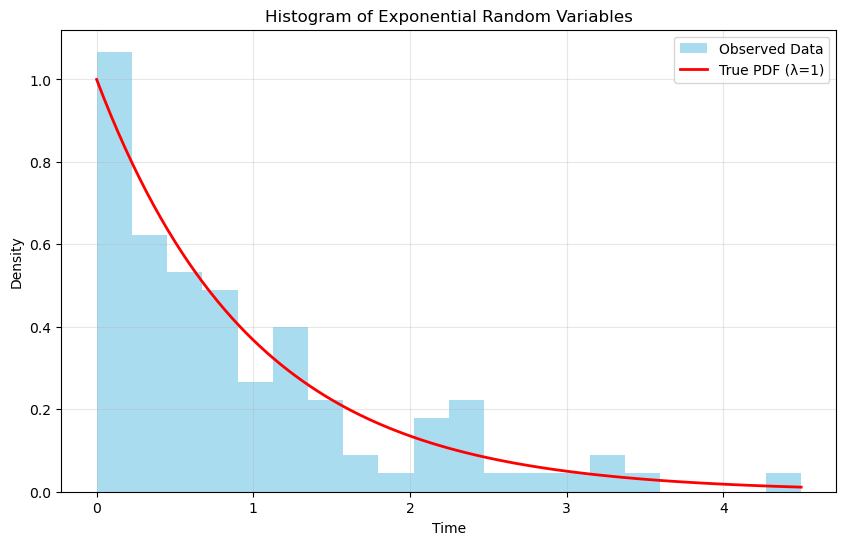

Experimental MLE estimate for λ: 1.0565
Analytical MLE estimate for λ: 1.0546


In [10]:
import matplotlib.pyplot as plt
from scipy.stats import expon 
import numpy as np

# Log-likelihood function for exponential distribution
def log_likelihood(lambda_val, data):
    return len(data) * np.log(lambda_val) - lambda_val * np.sum(data)


lambda_ = 1 # Once per year, on average
X = expon.rvs(scale=1/lambda_, size=100, random_state=1)
X[:3] # The first 3 intervals 

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(X, bins=20, density=True, alpha=0.7, color='skyblue', label='Observed Data')

# Add the true exponential PDF
x = np.linspace(0, max(X), 100)
plt.plot(x, lambda_ * np.exp(-lambda_ * x), 'r-', lw=2, label=f'True PDF (λ={lambda_})')

plt.title('Histogram of Exponential Random Variables')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# First, let's do a coarse grid search to find approximate region
lambda_grid = np.linspace(0.1, 5, 1000)
ll_values = [log_likelihood(l, X) for l in lambda_grid]
lambda_experimental = lambda_grid[np.argmax(ll_values)]

print(f"Experimental MLE estimate for λ: {lambda_experimental:.4f}")


lambda_hat_analytical = 1/np.mean(X)
print(f"Analytical MLE estimate for λ: {lambda_hat_analytical:.4f}")

1. Plot the histogram of the data.
1. Experimentally determine the MLE estimation for $\lambda$ corresponding to the observations in `X`.
1. Analytically determine the MLE estimation for $\lambda$.

## Exercise 5
Variance of a Gaussian distribution

Consider $X$ a random variable representing size of pollen grains following a normal (Gaussian) distribution with known mean 0 and a variance $\sigma^2$, formally written as $X \sim N(0, \sigma^2)$. Load the observations for this variable as a `numpy` array, by running the following code:

In [5]:
from sklearn.datasets import fetch_openml
pollen = fetch_openml('pollen', version=1, as_frame=False, parser='auto')
X = pollen.data[:,1]

1. Plot the histogram of the data.
1. Experimentally find the value of $\hat{\sigma}^2_\text{MLE}$ by testing candidates in the interval $[1, 10]$. Note that since the dataset is quite large, calculating the likelihood of the data can quickly result in an underflow on most systems. Try using the log-likelihood instead.
1. Analytically find the estimator $\hat{\sigma}^2_\text{MLE}$ and apply the resulting formula to the dataset.